# Data Preprocessing pipeline


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from sklearn.utils import resample



In [ ]:
filepath = "/Users/ziqismac/Desktop/SML/Project/data/US_Accidents_March23.csv"
# Read the data from the CSV file
chunksize = 10 ** 5  # Adjust the chunk size as needed
data_chunks = pd.read_csv(filepath, chunksize=chunksize)
df = next(data_chunks)
df


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-100002,Source2,3,2016-04-05 15:52:14,2016-04-05 16:52:14,32.731979,-117.111244,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-100003,Source2,3,2016-04-05 15:57:10,2016-04-05 16:57:10,33.913029,-118.125389,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99997,A-100004,Source2,2,2016-04-05 16:02:16,2016-04-05 17:02:16,34.121517,-117.536896,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
99998,A-100005,Source3,2,2016-04-05 16:01:17,2016-04-05 17:01:17,33.995079,-117.361183,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [5]:
df.describe(include='all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,100000,100000,100000.000000,100000,100000,100000.000000,100000.000000,0.0,0.0,100000.000000,...,100000,100000,100000,100000,100000,100000,99999,99999,99999,99999
unique,100000,2,NaN,98896,96724,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,1,2,2,2,2
top,A-1,Source2,NaN,2016-04-10 08:59:26,2016-10-14 19:50:00,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,99950,NaN,35,24,NaN,NaN,NaN,NaN,NaN,...,99995,96832,96676,99922,89301,100000,62510,66178,70266,74325
mean,NaN,NaN,2.448120,NaN,NaN,35.630369,-119.322756,NaN,NaN,0.011345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.499931,NaN,NaN,2.101259,3.663525,NaN,NaN,0.262244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,32.542587,-123.813927,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,33.957775,-121.828468,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,NaN,NaN,34.168579,-118.384232,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,NaN,NaN,37.776682,-117.916023,NaN,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Getting a summary of missing values in each column
missing_counts = None

total_rows = 0
for _ in open(filepath):
    total_rows += 1
chunk_num = (total_rows // chunksize) + 1

print("Start counting missing values...")
for chunk in tqdm.tqdm(pd.read_csv(filepath, chunksize=chunksize), total=chunk_num):
    chunk_missing = chunk.isnull().sum()
    if missing_counts is None:
        missing_counts = chunk_missing
    else:
        missing_counts += chunk_missing
    
    total_rows += len(chunk)

missing_percentage = (missing_counts / total_rows) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

Start counting missing values...


100%|██████████| 78/78 [00:31<00:00,  2.45it/s]


Text(0.5, 1.0, 'Missing Values Percentage by Column')

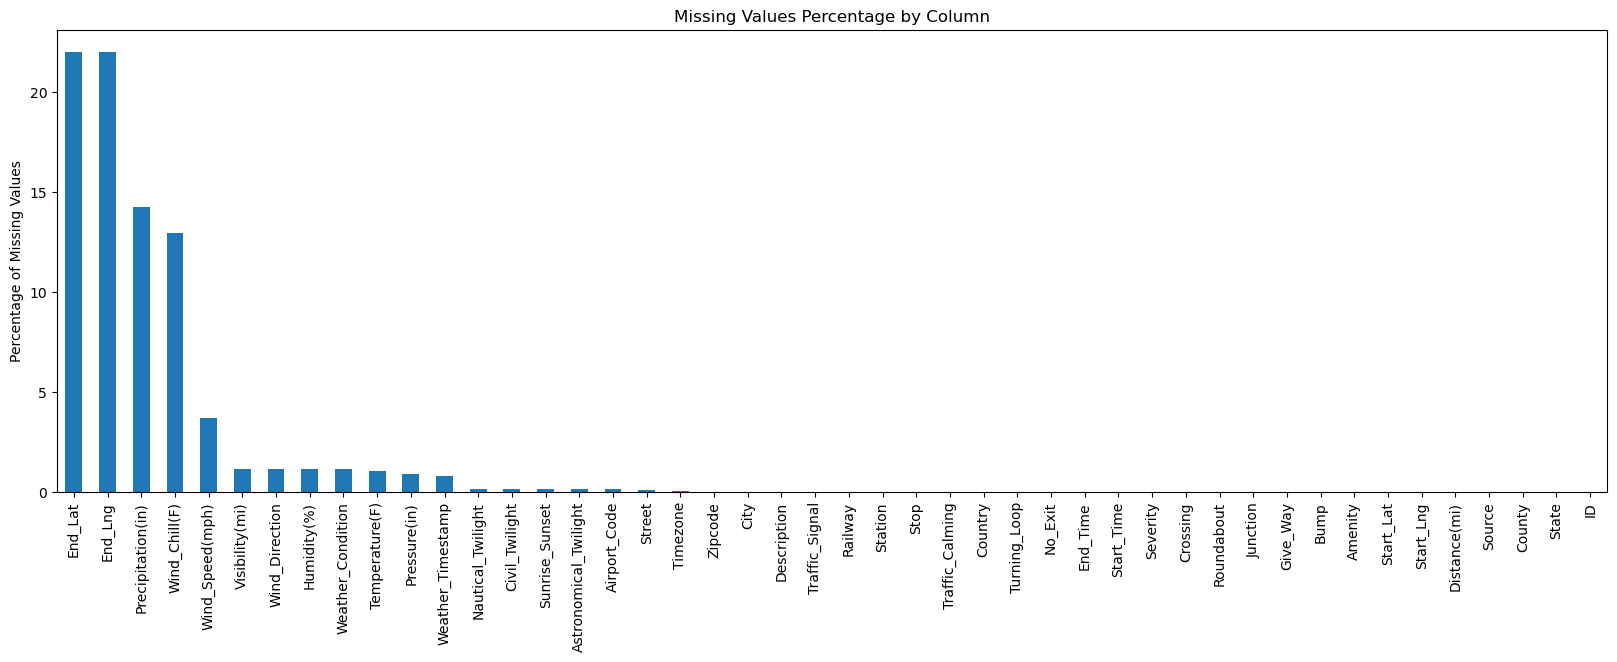

In [ ]:
missing_summary.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_summary.plot(kind='bar', y='Missing Percentage', figsize=(20,6), legend=False)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Percentage by Column')

In [ ]:
# Dropping the top 5 columns with the highest missing values
columns_to_drop = missing_summary.head(5).index.tolist()
cleaned_data = []
print("Starting to clean missing data in chunks...")
for chunk in tqdm.tqdm(pd.read_csv(filepath, chunksize=chunksize), total=chunk_num):
    # Drop rows with missing values in the top 5 columns
    chunk = chunk.dropna(subset=columns_to_drop)
    # Also drop the columns with the too many missing values
    chunk = chunk[chunk.isnull().mean(axis=1) < 0.1]
    # Append the cleaned chunk to the list
    cleaned_data.append(chunk)
df_cleaned = pd.concat(cleaned_data, ignore_index=True)
print("Processed data size after cleaning:", df_cleaned.shape)

Starting to clean missing data in chunks...


100%|██████████| 78/78 [00:31<00:00,  2.46it/s]


Processed data size after cleaning: (3608005, 46)


Severity
2    3397931
4     116007
3      68420
1      25647
Name: count, dtype: int64


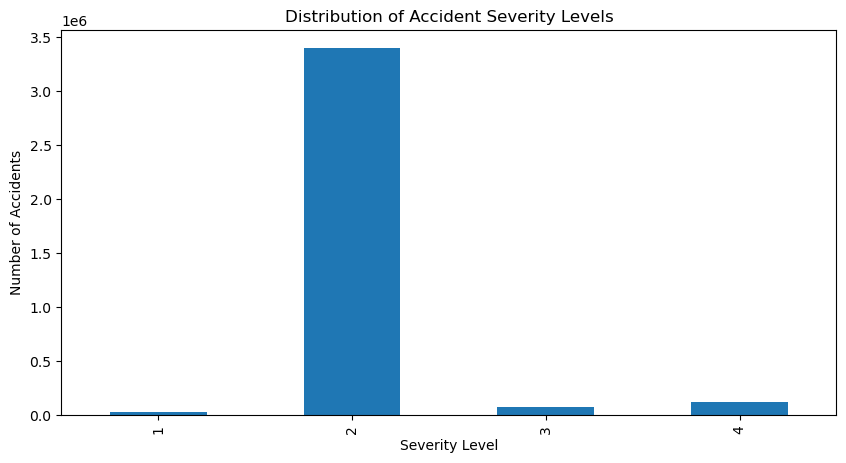

In [44]:
# 'severity' labels size
labels_count = df_cleaned['Severity'].value_counts()
print(labels_count)
# Visualize 'severity' distribution
labels_count.sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accident Severity Levels')
plt.show()

In [50]:
# under-sampling to balance the dataset
N = 25000
balanced_data = []
for severity_level in df_cleaned['Severity'].unique():
    severity_data = df_cleaned[df_cleaned['Severity'] == severity_level]
    if len(severity_data) > N:
        down_sampled_label = resample(severity_data, 
                                         replace=False, 
                                         n_samples=N, 
                                         random_state=68)
    else:
        down_sampled_label = severity_data

    balanced_data.append(down_sampled_label)

df_balanced = pd.concat(balanced_data).sample(frac=1, random_state=68).reset_index(drop=True)
print(df_balanced['Severity'].value_counts())

Severity
4    25000
2    25000
3    25000
1    25000
Name: count, dtype: int64


                       Remaining Missing Count  Remaining Missing Percentage
Astronomical_Twilight                      519                         0.519
Nautical_Twilight                          519                         0.519
Civil_Twilight                             519                         0.519
Sunrise_Sunset                             519                         0.519
Weather_Condition                          274                         0.274
Visibility(mi)                             258                         0.258
Street                                     153                         0.153
Humidity(%)                                151                         0.151
Pressure(in)                                69                         0.069
Distance(mi)                                 0                         0.000
Start_Lat                                    0                         0.000
Bump                                         0                         0.000

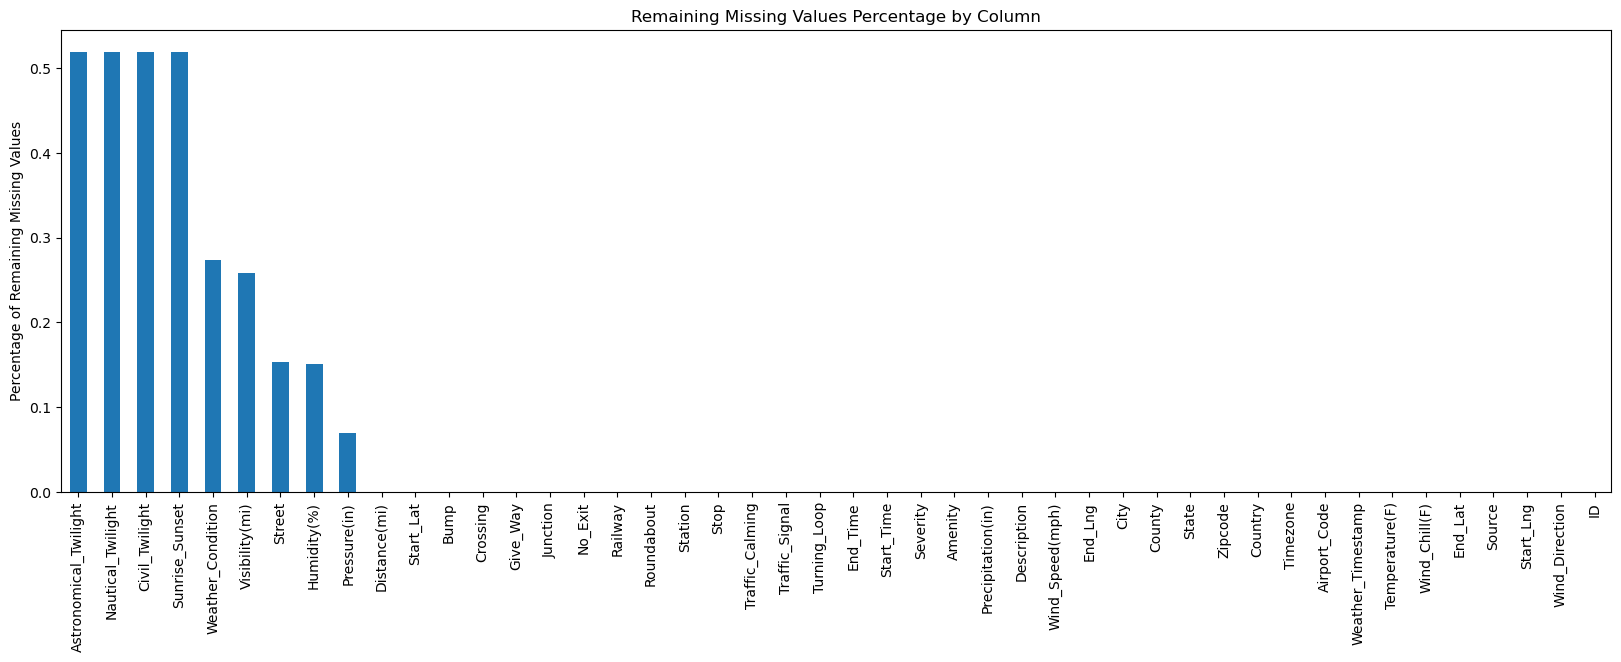

In [58]:
# Observing the remaining missing values after cleaning and down-sampling
remaining_missing = df_balanced.isnull().sum()
remaining_missing_percentage = (remaining_missing / len(df_balanced)) * 100

remaining_missing_summary = pd.DataFrame({
    'Remaining Missing Count': remaining_missing,
    'Remaining Missing Percentage': remaining_missing_percentage
})
remaining_missing_summary.sort_values(by='Remaining Missing Percentage', ascending=False, inplace=True)

print(remaining_missing_summary)

remaining_missing_summary.plot(kind='bar', y='Remaining Missing Percentage', figsize=(20,6), legend=False)
plt.ylabel('Percentage of Remaining Missing Values')
plt.title('Remaining Missing Values Percentage by Column')
plt.show()





In [ ]:
# Filling missing values with mean for numerical columns and mode for categorical columns
missing_cols = remaining_missing_summary[remaining_missing_summary['Remaining Missing Count'] > 0].index.tolist()
for col in missing_cols:
    if df_balanced[col].dtype in [np.float64, np.int64]:
        mean_value = df_balanced[col].mean()
        print(f"Filling missing values in {col} with mean: {mean_value}")
        df_balanced.fillna({col: mean_value}, inplace=True)
    else:
        print(f"Filling missing values in {col} with mode: 'Unknown'")
        df_balanced.fillna({col: "Unknown"}, inplace=True)

df_balanced.to_csv("/Users/ziqismac/Desktop/SML/Project/data/US_Accidents_Cleaned.csv", index=False)

Filling missing values in Astronomical_Twilight with mode: 'Unknown'
Filling missing values in Nautical_Twilight with mode: 'Unknown'
Filling missing values in Civil_Twilight with mode: 'Unknown'
Filling missing values in Sunrise_Sunset with mode: 'Unknown'
Filling missing values in Weather_Condition with mode: 'Unknown'
Filling missing values in Visibility(mi) with mean: 9.147323193840107
Filling missing values in Street with mode: 'Unknown'
Filling missing values in Humidity(%) with mean: 61.464671654197836
Filling missing values in Pressure(in) with mean: 29.131678157928967
